# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [6]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [9]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 [독립변수 - 원인]
y = dataset.iloc[:, -1].values  # 마지막 컬럼 데이터 [종속 변수 - 결과]

In [10]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성 
reg.fit(X,y)    # fit() 이라는 함수는 학습을 시키는 함수 

LinearRegression()

In [12]:
y_pred = reg.predict(X) # X 에 대한 예착 값 출력

In [13]:
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

##### X가 0.5 공부 했을 때, 예측 점수는 5.003363777
##### X가 1.2 공부 했을 때, 예측 점수는 12.31395163

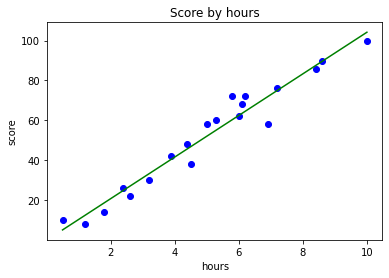

In [15]:
plt.scatter(X,y, color = 'blue')   # 산점도 그래프 표현하는 함수 scatter()
plt.plot(X, y_pred, color = 'green')  # 선 그래프 plot()
plt.title('Score by hours') # 제목 
plt.xlabel('hours')  # X 축 이름
plt.ylabel('score')  # Y 축 이름
plt.show()

In [16]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]]))

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [18]:
reg.coef_ #기울기 (m)

array([10.44369694])

In [19]:
reg.intercept_ # y절편 (b)

-0.21848470286721522

y = mx + b -> y = 10.4436x - 0.2184

## 데이터 셋 분리

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv("LinearRegressionData.csv")

In [23]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [24]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  
# 0.2는 20%   즉 8 : 2 로 train : test로 나누겠다는 의미 (랜덤으로)

In [26]:
X, len(X) # 전체 데이터 X의 개수 

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [27]:
X_train, len(X_train) #훈련세트 X 개수 

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [28]:
X_test, len(X_test) # 테스트 세트 X 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [29]:
y, len(y)  #전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [30]:
y_train, len(y_train) # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [32]:
y_test, len(y_test) # 테스트 세트 y

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [36]:
reg.fit(X_train, y_train) # 훈련 세트로 학습 

LinearRegression()

### 데이터 시각화 (TRAIN SET)

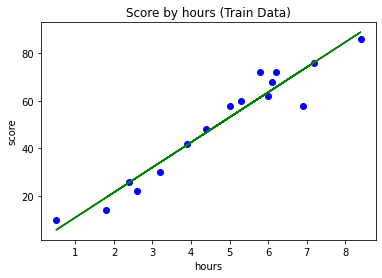

In [38]:
plt.scatter(X_train, y_train, color = 'blue')   # 산점도 그래프 표현하는 함수 scatter()
plt.plot(X_train, reg.predict(X_train), color = 'green')  # 선 그래프 plot()
plt.title('Score by hours (Train Data)') # 제목 
plt.xlabel('hours')  # X 축 이름
plt.ylabel('score')  # Y 축 이름
plt.show()

### 데이터 시각화 (TEST SET)

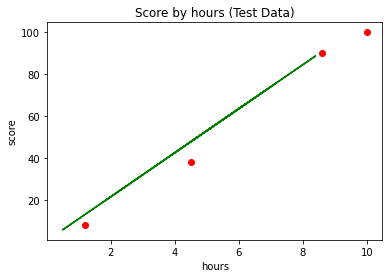

In [45]:
plt.scatter(X_test, y_test, color = 'red')   # 산점도 그래프 표현하는 함수 scatter()
plt.plot(X_train, reg.predict(X_train), color = 'green')  # 선 그래프 plot()
plt.title('Score by hours (Test Data)') # 제목 
plt.xlabel('hours')  # X 축 이름
plt.ylabel('score')  # Y 축 이름
plt.show()

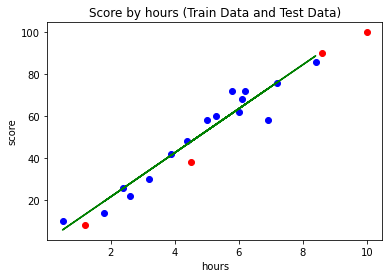

In [40]:
plt.scatter(X_test, y_test, color = 'red')   # 산점도 그래프 표현하는 함수 scatter()
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'green')  # 선 그래프 plot()
plt.title('Score by hours (Train Data and Test Data)') # 제목 
plt.xlabel('hours')  # X 축 이름
plt.ylabel('score')  # Y 축 이름
plt.show()

In [41]:
reg.coef_

array([10.49161294])

In [42]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [43]:
reg.score(X_test, y_test)

0.9727616474310156

In [44]:
reg.score(X_train, y_train)

0.9356663661221668

### 경사 하강법 (Gradient Descent)

In [2]:
from sklearn.linear_model import SGDRegressor  # SGD : Stochastic Gradient Descent : 확률적 경사 하강법

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  
# 0.2는 20%   즉 8 : 2 로 train : test로 나누겠다는 의미 (랜덤으로)

In [10]:
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

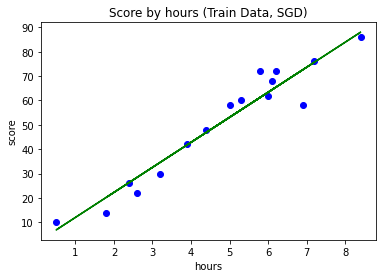

In [11]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'green')  # 선 그래프 plot()
plt.title('Score by hours (Train Data, SGD)') # 제목 
plt.xlabel('hours')  # X 축 이름
plt.ylabel('score')  # Y 축 이름
plt.show()

In [12]:
sr.coef_, sr.intercept_

(array([10.26093494]), array([1.78961284]))

In [13]:
sr.score(X_test, y_test) # Test set를 통한 모델 평가 

0.9725768676798914

In [15]:
sr.score(X_train, y_train)

0.935199667693081

#### max_iter  :  훈련 세트 반복 횟수 (Epoch 횟수)
#### eta0  :  학습률 (Learning rate)

In [18]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter = 1000, eta0 = 0.01, random_state = 0, verbose = 1)  
# 훈련 set 반복 세트 : max_iter,  Running Rate = eat0 (0.01 is a default value)  
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 9.29, NNZs: 1, Bias: 1.896809, T: 16, Avg. loss: 273.972341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.22, NNZs: 1, Bias: 2.051952, T: 32, Avg. loss: 21.528918
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.29, NNZs: 1, Bias: 2.048223, T: 48, Avg. loss: 19.357188
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.18, NNZs: 1, Bias: 2.017074, T: 64, Avg. loss: 19.101267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 1, Bias: 1.980206, T: 80, Avg. loss: 18.424713
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.19, NNZs: 1, Bias: 1.995352, T: 96, Avg. loss: 19.235589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.33, NNZs: 1, Bias: 2.005374, T: 112, Avg. loss: 18.213245
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.19, NNZs: 1, Bias: 1.971733, T: 128, Avg. loss: 18.722017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.08, NNZs: 1, Bias: 1.941770, T: 144, Avg. loss: 18.247385
Total training time: 0.0

SGDRegressor(random_state=0, verbose=1)

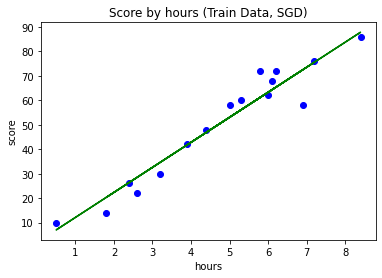

In [19]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'green')  # 선 그래프 plot()
plt.title('Score by hours (Train Data, SGD)') # 제목 
plt.xlabel('hours')  # X 축 이름
plt.ylabel('score')  # Y 축 이름
plt.show()